In [210]:
import yfinance as yf

security = yf.Ticker("SPY")
start_date = '2014-01-01'
end_date = '2024-01-01'
data = security.history(interval='1d', start=start_date, end=end_date)


In [211]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2014-01-02 00:00:00-05:00,153.078201,153.153094,151.830145,152.196243,119636900,0.0,0.0,0.0
2014-01-03 00:00:00-05:00,152.454185,152.762047,151.954970,152.171295,81390600,0.0,0.0,0.0
2014-01-06 00:00:00-05:00,152.670568,152.728804,151.497392,151.730362,108028200,0.0,0.0,0.0
2014-01-07 00:00:00-05:00,152.337722,152.920146,152.221237,152.662216,86144200,0.0,0.0,0.0
2014-01-08 00:00:00-05:00,152.637247,152.953425,152.171308,152.695496,96582300,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,472.392233,473.907544,470.238950,472.182892,67126600,0.0,0.0,0.0
2023-12-26 00:00:00-05:00,472.601604,475.103809,472.521835,474.176697,55387000,0.0,0.0,0.0
2023-12-27 00:00:00-05:00,473.967365,475.183587,473.419080,475.034058,68000300,0.0,0.0,0.0


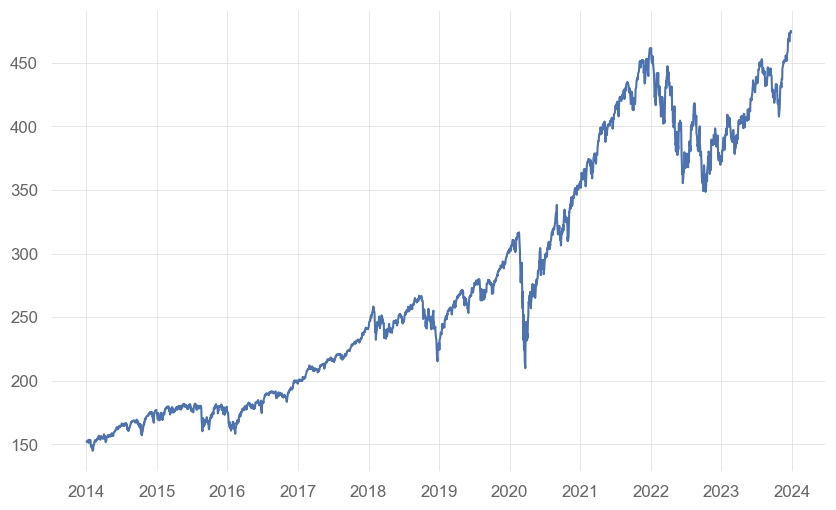

In [212]:
plt.plot(data.index, data.Close, label='Close')

In [213]:
data['Daily Returns'] = data['Close'].pct_change()
data['Cumulative Returns'] = (1.0 + data['Daily Returns']).cumprod()

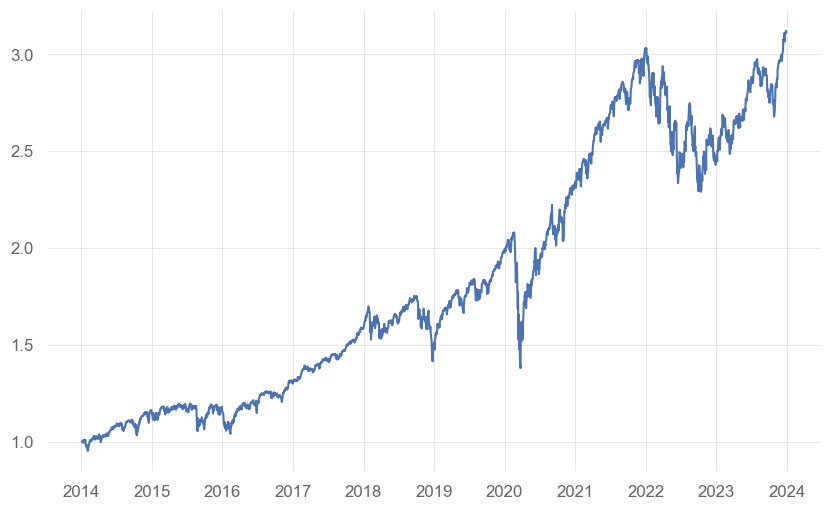

In [214]:
plt.plot(data.index, data['Cumulative Returns'], label='Close')

In [215]:
import pandas as pd

#result["trading_day_of_year"]=result.groupby(pd.Grouper(freq='Y'))[['constant']].cumsum()
#data.groupby(pd.Grouper(freq='Y'))['Daily Returns'].describe()
#data["trading_day_of_year"]=
data['yearly_cumulative'] = data.groupby(pd.Grouper(freq='Y'))[['Daily Returns']].cumsum()


In [216]:
data.index

DatetimeIndex(['2014-01-02 00:00:00-05:00', '2014-01-03 00:00:00-05:00',
               '2014-01-06 00:00:00-05:00', '2014-01-07 00:00:00-05:00',
               '2014-01-08 00:00:00-05:00', '2014-01-09 00:00:00-05:00',
               '2014-01-10 00:00:00-05:00', '2014-01-13 00:00:00-05:00',
               '2014-01-14 00:00:00-05:00', '2014-01-15 00:00:00-05:00',
               ...
               '2023-12-15 00:00:00-05:00', '2023-12-18 00:00:00-05:00',
               '2023-12-19 00:00:00-05:00', '2023-12-20 00:00:00-05:00',
               '2023-12-21 00:00:00-05:00', '2023-12-22 00:00:00-05:00',
               '2023-12-26 00:00:00-05:00', '2023-12-27 00:00:00-05:00',
               '2023-12-28 00:00:00-05:00', '2023-12-29 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=2516, freq=None)

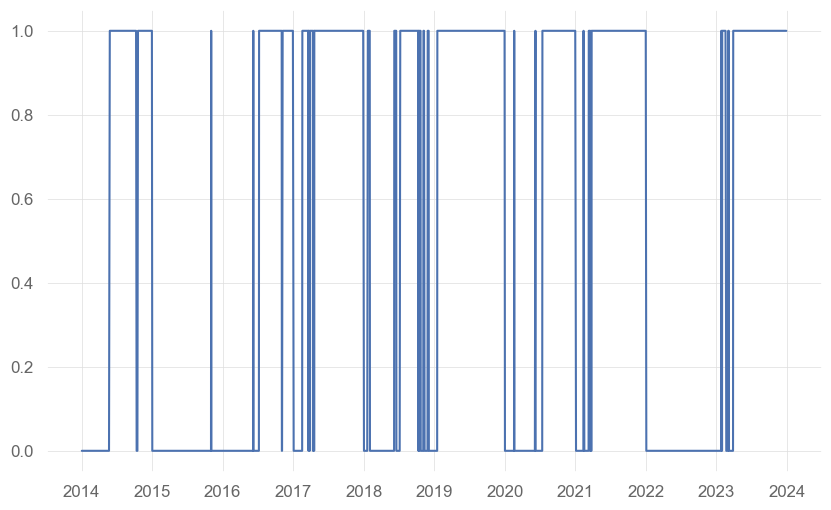

In [217]:
plt.plot(data.index, data['yearly_cumulative']>.05, label='Close')

In [218]:
data['yearly_cumulative_threshold']=data['yearly_cumulative']>.16
data['yearly_cumulative_threshold_shift'] = data['yearly_cumulative_threshold'].shift(-1)
#data.groupby(pd.Grouper(freq='Y'))[['Daily Returns']] > .05

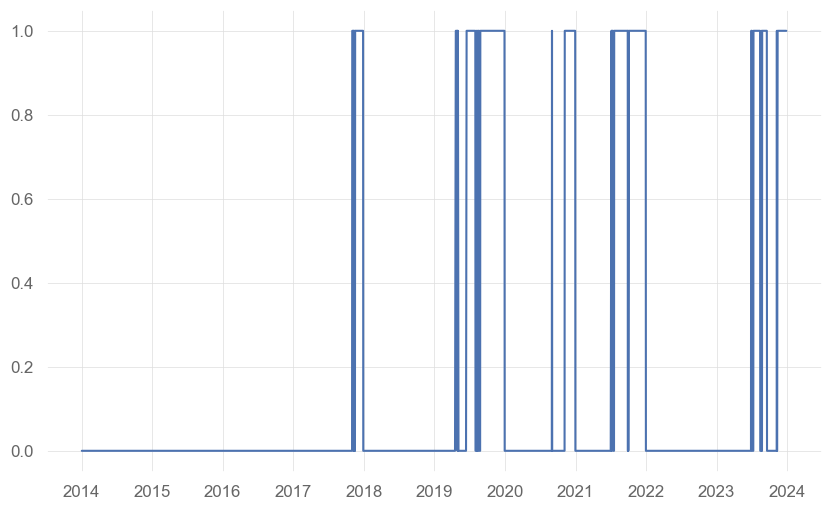

In [219]:
plt.plot(data.index, data['yearly_cumulative_threshold'].shift(-1), label='Close')

In [220]:
data['yearly_cumulative_threshold_cumulative_sum']=data.groupby(pd.Grouper(freq='Y'))[['yearly_cumulative_threshold']].cumsum()


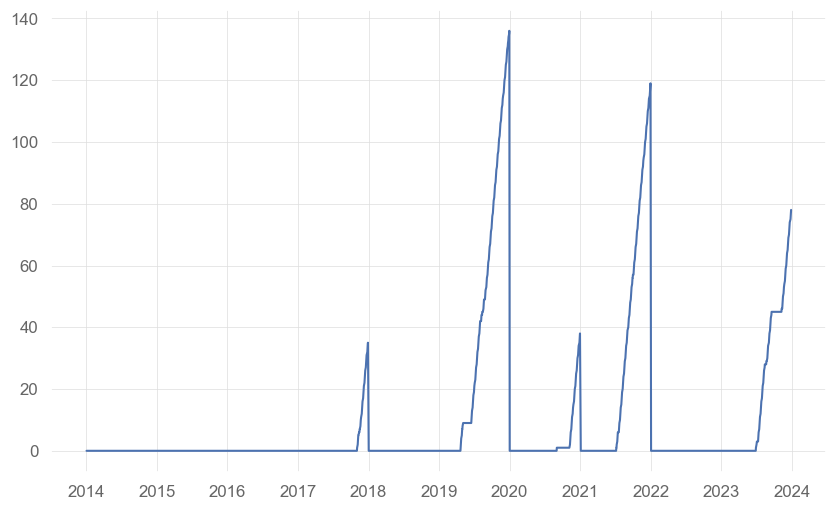

In [221]:
plt.plot(data.index, data['yearly_cumulative_threshold_cumulative_sum'], label='Close')

In [222]:
data['yearly_cumulative_threshold_cumulative_sum_threshold']=data['yearly_cumulative_threshold_cumulative_sum'] >0

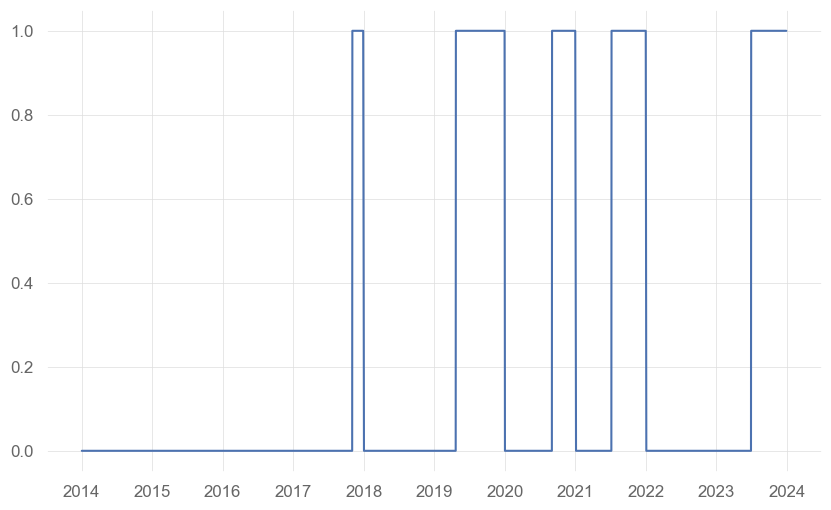

In [223]:
plt.plot(data.index, data['yearly_cumulative_threshold_cumulative_sum_threshold'], label='Close')

In [224]:
data['yearly_cumulative_threshold_cumulative_sum_threshold_inverse']=(0-data['yearly_cumulative_threshold_cumulative_sum_threshold'])+1

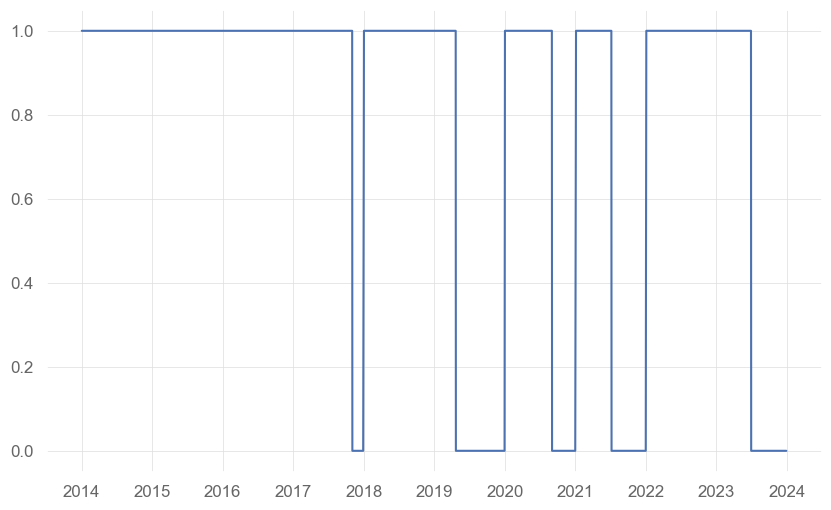

In [225]:
plt.plot(data.index, data['yearly_cumulative_threshold_cumulative_sum_threshold_inverse'], label='Close')

In [226]:
data['daily_masked']=data['yearly_cumulative_threshold_cumulative_sum_threshold_inverse']*data['Daily Returns']

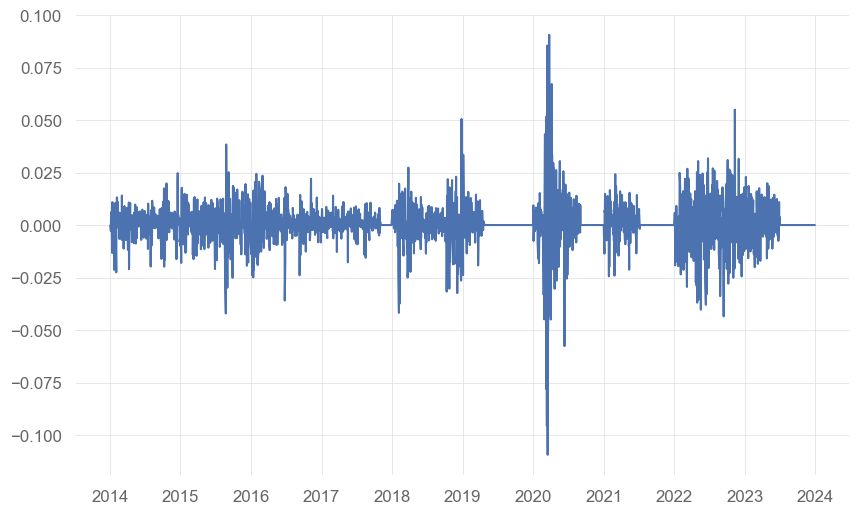

In [241]:
plt.plot(data.index, data['daily_masked'], label='Close')

In [242]:
data['Cumulative Returns Strategy'] = (1.0 + data['daily_masked']).cumprod()

## JP Strategy

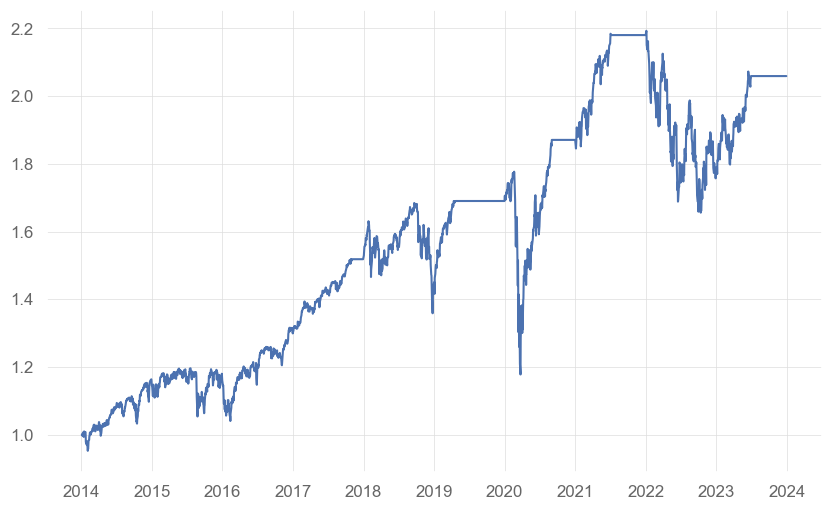

In [243]:
plt.plot(data.index, data['Cumulative Returns Strategy'], label='Close')

## SPY buy and hold

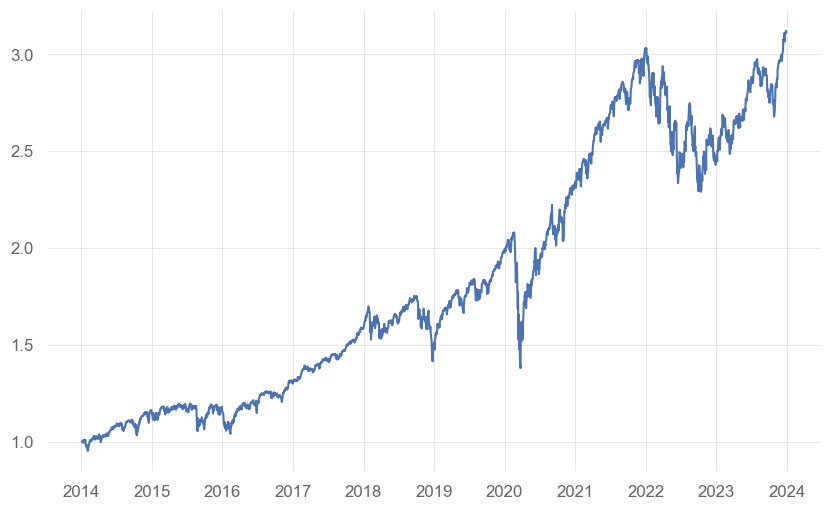

In [244]:
plt.plot(data.index, data['Cumulative Returns'], label='Close')